In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
!unzip /content/drive/MyDrive/HodaDatasetReader-master.zip 

Archive:  /content/drive/MyDrive/HodaDatasetReader-master.zip
728dd5465fcf38c3c82a1d3fda721da30b2e70ed
   creating: HodaDatasetReader-master/
 extracting: HodaDatasetReader-master/.gitignore  
   creating: HodaDatasetReader-master/DigitDB/
  inflating: HodaDatasetReader-master/DigitDB/RemainingSamples.cdb  
  inflating: HodaDatasetReader-master/DigitDB/Test 20000.cdb  
  inflating: HodaDatasetReader-master/DigitDB/Train 60000.cdb  
  inflating: HodaDatasetReader-master/Farsi_Digits_Sample_1.gif  
  inflating: HodaDatasetReader-master/Farsi_Digits_Sample_2.gif  
  inflating: HodaDatasetReader-master/Figure_1.png  
  inflating: HodaDatasetReader-master/Figure_2.png  
  inflating: HodaDatasetReader-master/HodaDatasetReader.py  
  inflating: HodaDatasetReader-master/LICENSE  
  inflating: HodaDatasetReader-master/README.md  
  inflating: HodaDatasetReader-master/dataset_PRL.pdf  
  inflating: HodaDatasetReader-master/main.py  


In [9]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from sklearn.metrics import classification_report
from HodaDatasetReader.HodaDatasetReader import *
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy

In [2]:
# Get the Train and Test data
DATA_PATH = '/content/HodaDatasetReader/DigitDB/'

TRAIN_PATH = DATA_PATH + 'Train 60000.cdb'

TEST_PATH = DATA_PATH + 'Test 20000.cdb'

In [3]:
X_train, Y_train = read_hoda_dataset(dataset_path=TRAIN_PATH,
                                    images_height=32,
                                    images_width=32,
                                    one_hot=False,
                                    reshape=True)

X_test, Y_test = read_hoda_dataset(dataset_path=TEST_PATH,
                                  images_height=32,
                                  images_width=32,
                                  one_hot=False,
                                  reshape=True)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 1024) (60000,)
(20000, 1024) (20000,)


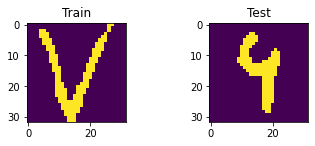

In [4]:
# Plot the Train and Test data
img1 = plt.subplot(221)
train_index = random.randint(0, len(X_train))
test_index = random.randint(0, len(X_test))
img1.set_title('Train')
plt.imshow(X_train[train_index].reshape(32,32))
img2 = plt.subplot(222)
plt.imshow(X_train[test_index].reshape(32,32))
img2.set_title('Test')

plt.show()

In [5]:
# X_train = np.expand_dims(X_train, axis=2)
# X_test = np.expand_dims(X_test, axis=2)

# Normalize the Train and Test data
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(60000, 1024) (20000, 1024) (60000, 10) (20000, 10)


In [6]:
def recall_m(y_true, y_pred):
    K = tf.keras.backend
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    K = tf.keras.backend
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    K = tf.keras.backend
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [7]:
# Build model
def build_model():
  model = Sequential()
  model.add(Dense(100, input_shape=(32 * 32,), activation='relu'))
  model.add(Dropout(0.02))
  model.add(Dense(400, activation='relu'))
  model.add(Dense(num_classes, activation='sigmoid'))
  return model

In [10]:
model = build_model()
# Compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', f1_m, precision_m, recall_m])

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=200)

Epoch 1/10
300/300 [==============================] - 4s 10ms/step - loss: 1.5234 - accuracy: 0.5657 - f1_m: 0.3588 - precision_m: 0.2282 - recall_m: 0.8429 - val_loss: 0.4887 - val_accuracy: 0.8363 - val_f1_m: 0.4723 - val_precision_m: 0.3149 - val_recall_m: 0.9756
Epoch 2/10
300/300 [==============================] - 3s 9ms/step - loss: 0.2605 - accuracy: 0.9243 - f1_m: 0.4631 - precision_m: 0.3024 - recall_m: 0.9895 - val_loss: 0.3674 - val_accuracy: 0.8850 - val_f1_m: 0.4880 - val_precision_m: 0.3295 - val_recall_m: 0.9828
Epoch 3/10
300/300 [==============================] - 3s 8ms/step - loss: 0.1927 - accuracy: 0.9446 - f1_m: 0.4728 - precision_m: 0.3103 - recall_m: 0.9930 - val_loss: 0.3209 - val_accuracy: 0.9018 - val_f1_m: 0.4963 - val_precision_m: 0.3377 - val_recall_m: 0.9859
Epoch 4/10
300/300 [==============================] - 3s 9ms/step - loss: 0.1633 - accuracy: 0.9532 - f1_m: 0.4815 - precision_m: 0.3178 - recall_m: 0.9938 - val_loss: 0.2831 - val_accuracy: 0.9146 - v

In [15]:
# Final evaluation of the model
train_eval = model.evaluate(X_train, Y_train, batch_size=200)
test_eval = model.evaluate(X_test, Y_test, batch_size=200)
print("Train eval : ", train_eval)
print("Test eval : ", test_eval)

100/100 [==============================] - 0s 3ms/step - loss: 0.1716 - accuracy: 0.9498 - f1_m: 0.5484 - precision_m: 0.3864 - recall_m: 0.9931
Train eval :  [0.07335953414440155, 0.9796333312988281, 0.5368852019309998, 0.36729517579078674, 0.9978994727134705]
Test eval :  [0.17162111401557922, 0.9498000144958496, 0.5484216213226318, 0.3863980174064636, 0.993100106716156]


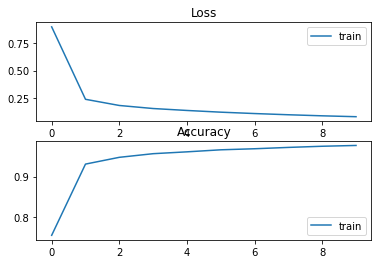

In [16]:
# Plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.legend()

# Plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.legend()

plt.show()


In [17]:
Y_pred = model.predict(X_test, batch_size=200, verbose=1)
print(Y_pred)
print(Y_test)
Y_pred_bool = np.argmax(Y_pred, axis=1)

100/100 [==============================] - 0s 3ms/step
[[9.9962062e-01 5.4249465e-03 7.3274970e-04 ... 3.7899762e-01
  4.6551609e-01 2.1617115e-03]
 [9.9962151e-01 1.1842400e-02 3.5682321e-04 ... 5.2675587e-01
  8.0568212e-01 2.5007129e-04]
 [9.3925786e-01 6.4306855e-01 1.5020370e-04 ... 4.4699740e-01
  2.8238881e-01 3.2887757e-03]
 ...
 [2.4017751e-02 9.6386975e-01 9.3751937e-02 ... 5.2279234e-04
  6.6311359e-03 5.9519613e-01]
 [1.9000769e-03 1.2021959e-03 1.5613943e-02 ... 5.6133706e-07
  7.3301136e-01 9.9985135e-01]
 [2.3862720e-04 5.9611357e-06 1.7382997e-01 ... 9.5077288e-09
  3.8661614e-01 9.9999583e-01]]
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
print(classification_report(y_true, y_pred, target_names=target_names))

Confusion Matrix
[[1973    0    0    0    5   17    2    2    1    0]
 [   8 1961   10    0    2    0   11    4    1    3]
 [   3   29 1826   69   30    0   27    1    1   14]
 [   5    1   76 1833   72    1    8    2    0    2]
 [   7    5   15   83 1841   12   13    2    4   18]
 [   4    7    0    1   15 1944    5    6   17    1]
 [   3   14   13    6   17    3 1899    4    5   36]
 [  15    7   21    5    7   14   17 1910    4    0]
 [   5    3    2    3   14    7   13    0 1930   23]
 [   2   32    5    3   12    2   41    0   24 1879]]
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2000
           1       0.95      0.98      0.97      2000
           2       0.93      0.91      0.92      2000
           3       0.92      0.92      0.92      2000
           4       0.91      0.92      0.92      2000
           5       0.97      0.97      0.97      2000
           6       0.93      0.95      0.94      20